# IMPORTANCE OF HANDWASHING 

Hungarian physician Dr. Ignaz Semmelweis worked at the Vienna General Hospital with childbed 
fever patients. Childbed fever is a deadly disease affecting women who have just given birth, and 
in the early 1840s, as many as 10% of the women giving birth died from it at the Vienna General 
Hospital. 

Dr.Semmelweis discovered that it was the contaminated hands of the doctors delivering 
the babies, and on June 1st, 1847, he decreed that everyone should wash their hands, an unorthodox 
and controversial request; nobody in Vienna knew about bacteria.

You will reanalyze the data that made Semmelweis discover the importance of handwashing and 
its impact on the hospital and the number of deaths. 

In [1]:
# import necessary libraries and load dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

yrly_deaths = pd.read_csv(r"C:\Users\USER\Desktop\DATA ANALYSIS CLASS\VSCODE\DATASET\PROJECT\birth_death\birth_death\yearly_deaths_by_clinic.csv")
monthly_deaths = pd.read_csv(r"C:\Users\USER\Desktop\DATA ANALYSIS CLASS\VSCODE\DATASET\PROJECT\birth_death\birth_death\monthly_deaths.csv")
monthly_deaths.head()

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


Objective of your analysis: 

• To determine the year that had the highest yearly proportion of deaths at each clinic through 
visualization 

<Axes: xlabel='clinic,year'>

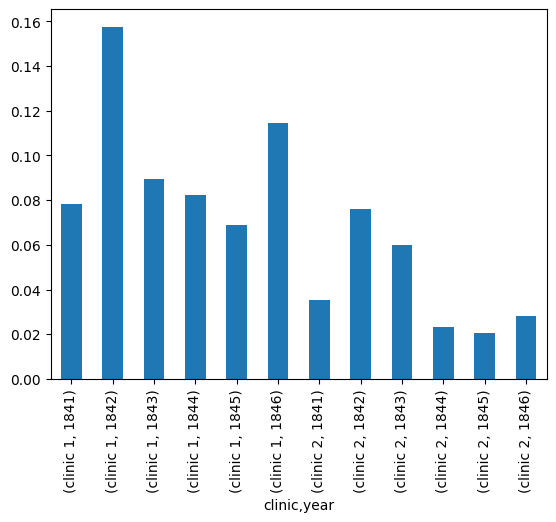

In [ ]:
# Calculate death proportion
yrly_deaths['death_proportion'] = yrly_deaths['deaths'] / yrly_deaths['births']

# Group by year and clinic
by_clinic = yrly_deaths.groupby(["clinic", 'year',])['death_proportion'].sum()
by_clinic

# Find the max proportion per clinic with a bar plot
by_clinic.plot(kind= "bar")

# The plot below shows that for both clinic 1 and 2, year 1842 had the highest yearly proportion of deaths

• To determine the mean proportions of deaths before and after handwashing from the 
monthly data. 

(Store the result as a 2x2 DataFrame named monthly_summary with the first 
column, handwashing_started, being a boolean flag and the second column having the 
mean proportion of deaths). 

In [12]:
monthly_deaths = pd.read_csv(r"C:\Users\USER\Desktop\DATA ANALYSIS CLASS\VSCODE\DATASET\PROJECT\birth_death\birth_death\monthly_deaths.csv")
monthly_deaths["date"] = pd.to_datetime(monthly_deaths["date"])
monthly_deaths

# calculate the death proportion
monthly_deaths["death proportion"] = (monthly_deaths["deaths"]/monthly_deaths["births"]).round(2)

# Handwash started from June 1st 1847
# extract data before the start
before = monthly_deaths.query("date < '1847-06-01'")

# extract data after the start
after = monthly_deaths.query("date >= '1847-06-01'")

# calculate the mean for before and after

mean_prop = pd.DataFrame({"Handwashing_started": [False, True], 
                          "mean proportion": [before["death proportion"].mean(), after["death proportion"].mean()]})
mean_prop

,Handwashing_started,mean proportion
0,False,0.104605
1,True,0.020909


• To analyze the difference in the mean monthly proportion of deaths before and after the 
introduction of handwashing  

Text(0.5, 1.0, 'Mean monthly proportion of deaths at clinic 1, Vienna General Hospital')

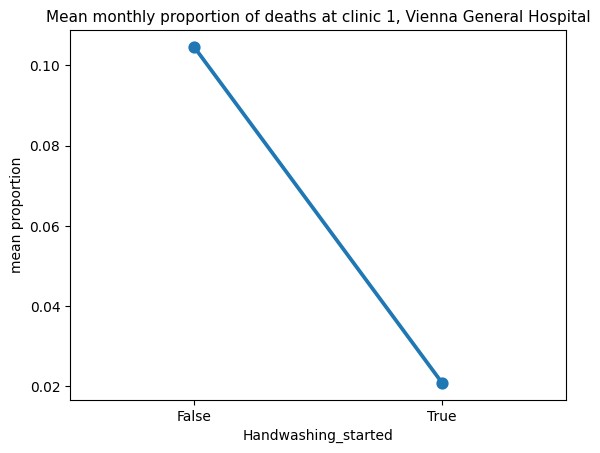

In [ ]:
sns.pointplot(data = mean_prop, x = "Handwashing_started" , y = "mean proportion", errorbar= None)
plt.title("Mean monthly proportion of deaths at clinic 1, Vienna General Hospital", fontsize = 11)

# Analysis Result

The point plot of the mean monthly proportion of deaths among women due to childbirth fever reveals a significant drop at Vienna General Hospital following the introduction of handwashing by Dr. Semmelweis on June 1st, 1847. 

The death proportion, which had exceeded 10% prior to the implementation of handwashing, fell to approximately 2%. This decline shows the critical importance of this strategy and its  positive impact on hospital outcomes.